## Análise de dados de COVID-19 em Toronto

<b> Seguindo a metodologia CRISP-DM </b>

<b> 1. Entendimento do negócio </b>

O dataset traz informações sobre os casos de COVID registrados na cidade de Toronto, no Canadá. O objetivo desta análise é identificar padrões relacionados a infecção pelo vírus que podem ser úteis na prevenção de novos casos. Os dados analisados aqui foram retirados do Ministério da Saúde do Canadá

<b> 2. Entendimento dos dados </b>

<b> 2.1 Coleta de dados </b>

In [11]:
# importando bibliotecas

import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
# Dados importados do Ministério da Saúde do Canadá:

dataset = pd.read_csv('COVID19 cases Toronto.csv')

dataset.head()

,_id,Outbreak Associated,Age Group,Neighbourhood Name,FSA,Source of Infection,Classification,Episode Date,Reported Date,Client Gender,Outcome,Currently Hospitalized,Currently in ICU,Currently Intubated,Ever Hospitalized,Ever in ICU,Ever Intubated
0,44294,Sporadic,50-59,Malvern,M1B,Institutional,CONFIRMED,2020-03-25,2020-03-27,MALE,RESOLVED,No,No,No,No,No,No
1,44295,Sporadic,20-29,Malvern,M1B,Community,CONFIRMED,2020-03-20,2020-03-28,MALE,RESOLVED,No,No,No,Yes,No,No
2,44296,Sporadic,60-69,Malvern,M1B,Travel,CONFIRMED,2020-03-04,2020-03-08,FEMALE,RESOLVED,No,No,No,Yes,Yes,Yes
3,44297,Outbreak Associated,50-59,Rouge,M1B,N/A - Outbreak associated,CONFIRMED,2020-05-02,2020-05-04,FEMALE,RESOLVED,No,No,No,No,No,No
4,44298,Sporadic,30-39,Rouge,M1B,Close contact,CONFIRMED,2020-05-31,2020-06-06,FEMALE,RESOLVED,No,No,No,No,No,No


<b> 2.2 Descrição dos dados </b>

<b> Colunas </b> 

* **ID**: ID do paciente 
<br>
* **Outbreak Associated**: como o paciente foi contaminado
<br>
* **Age Group**: faixa etária do paciente
<br>
* **Neighbourhood Name**: bairro onde o paciente mora
<br>
* **FSA**: identificação postal do paciente
<br>
* **Source of Infection**: como o paciente foi infectado
<br>
* **Classification**: resultado de seu exame de COVID
<br>
* **Episode Date**: data da infecção
<br>
* **Reported Date**: data do diagnóstico
<br>
* **Client Gender**: gênero do paciente
<br>
* **Outcome**: situação do paciente
<br>
* **Currently Hospitalized**: se o paciente está hospitalizado (1 -- NO/0 -- YES)
<br>
* **Currently in ICU**: se o paciente está em UTI 
<br>
* **Currently Intubated**: se o paciente está entubado 
<br>
* **Ever Hospitalized**: se o paciente já foi hospitalizado 
<br>
* **Ever in ICU**: se o paciente já esteve em UTI
<br>
* **Ever Intubated**: se o paciente já foi entubado

In [52]:
# coletando informações iniciais

# verificando os tipos de dado em cada coluna do dataset e o número de ocorrências

dataset.info()

# verificando estatísticas em cada coluna

dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14911 entries, 0 to 14910
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   _id                       14911 non-null  int64         
 1   Outbreak Associated       14911 non-null  object        
 2   Age Group                 14911 non-null  object        
 3   Neighbourhood Name        14911 non-null  object        
 4   FSA                       14911 non-null  object        
 5   Source of Infection       14911 non-null  object        
 6   Classification            14911 non-null  object        
 7   Episode Date              14911 non-null  datetime64[ns]
 8   Reported Date             14911 non-null  datetime64[ns]
 9   Client Gender             14911 non-null  object        
 10  Outcome                   14911 non-null  object        
 11  Currently Hospitalized    14911 non-null  int64         
 12  Currently in ICU  

,_id,Currently Hospitalized,Currently in ICU,Currently Intubated,Ever Hospitalized,Ever in ICU,Ever Intubated,dias sem reportar o caso
count,14911.000000,14911.000000,14911.000000,14911.000000,14911.000000,14911.000000,14911.000000,14911.000000
mean,51749.000000,0.989873,0.998055,0.998323,0.876065,0.973174,0.980752,5.878680
std,4304.579267,0.100124,0.044059,0.040914,0.329519,0.161580,0.137398,8.636638
min,44294.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-71.000000
25%,48021.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
50%,51749.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000
75%,55476.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000
max,59204.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000


In [14]:
# verificando o período em os casos coletados ocorreram

dataset['Reported Date'].describe()

count          14911
unique           142
top       2020-05-29
freq             437
Name: Reported Date, dtype: object

<b> Informações iniciais:

* <b> 14911 pacientes serão analisados
* <b> Os dados foram coletados entre janeiro e julho de 2020

<b> 3. Preparação dos dados </b>

<b> Os dados já estão ordenados por ID

<b> 3.1 Limpando os dados

In [15]:
# verificando a quantidade de dados nulos em cada coluna

dataset.isnull().sum()

_id                         0
Outbreak Associated         0
Age Group                  32
Neighbourhood Name        613
FSA                       567
Source of Infection         0
Classification              0
Episode Date                0
Reported Date               0
Client Gender               0
Outcome                     0
Currently Hospitalized      0
Currently in ICU            0
Currently Intubated         0
Ever Hospitalized           0
Ever in ICU                 0
Ever Intubated              0
dtype: int64

In [45]:
# trocando para facilitar a visualização

dataset['Age Group'].replace('19 and younger', '19-', inplace=True)

In [16]:
# susbtituindo dados nulos em "Age Group" pelo dado mais frequente

dataset['Age Group'].fillna(dataset['Age Group'].value_counts().index[0], inplace=True)

In [17]:
# susbtituindo dados nulos em "Neighbourhood Name" pelo atributo 'Unknown'

dataset['Neighbourhood Name'].fillna('Unknown', inplace=True)

In [39]:
# susbtituindo dados nulos em "FSA" pelo atributo 'Unknown'

dataset['FSA'].fillna('Unknown', inplace=True)

In [41]:
# substituindo os dados nulos de "Client Gender"  por 'OTHER'

dataset['Client Gender'].replace('UNKNOWN', 'OTHER', inplace=True)

dataset['Client Gender'].value_counts()

FEMALE         7909
MALE           6747
OTHER           248
TRANSGENDER       7
Name: Client Gender, dtype: int64

<b> 3.2 Formatando os dados </b>

In [20]:
# convertendo 'objects' em 'datetime' nas colunas de dados

dataset['Episode Date'] = pd.to_datetime(dataset['Episode Date'])
dataset['Reported Date'] = pd.to_datetime(dataset['Reported Date'])

# substituindo os valores "YES/NO" por valores "1/0" (não são booleanos!)

dataset.replace(['No', 'Yes'], [1, 0], inplace=True)

# por que não usar o astype no lugar do replace?

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14911 entries, 0 to 14910
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   _id                     14911 non-null  int64         
 1   Outbreak Associated     14911 non-null  object        
 2   Age Group               14911 non-null  object        
 3   Neighbourhood Name      14911 non-null  object        
 4   FSA                     14911 non-null  object        
 5   Source of Infection     14911 non-null  object        
 6   Classification          14911 non-null  object        
 7   Episode Date            14911 non-null  datetime64[ns]
 8   Reported Date           14911 non-null  datetime64[ns]
 9   Client Gender           14911 non-null  object        
 10  Outcome                 14911 non-null  object        
 11  Currently Hospitalized  14911 non-null  int64         
 12  Currently in ICU        14911 non-null  int64 

<b> 4. Exploração dos dados

In [21]:
# verificando quantos dias o paciente levou para reportar o caso

dataset['dias sem reportar o caso'] = (dataset['Reported Date'] - dataset['Episode Date']).dt.days

dataset['dias sem reportar o caso'].value_counts()

dataset.index[dataset['dias sem reportar o caso'] < 0]

# existem 451 pacientes com datas estranhas. seriam casos de infecção posterior?

# se forem resultados válidos, dá pra fazer correlações legais


# média dos dias (sem os valores negativos estranhos)

negativos = dataset.index[dataset['dias sem reportar o caso'] < 0]

dataset['dias sem reportar o caso'].drop(negativos)

dataset['dias sem reportar o caso'].mean()

5.87868016900275

In [22]:
# verificando qual gênero e faixa etária foram mais afetados

dataset['Client Gender'].value_counts()
dataset['Age Group'].value_counts()

# a maioria dos casos foram em mulheres

# a faixa etária mais atingida foi a de entre 50-59 anos

# agora vou tentar verificar a faixa etária mais atingida entre homens e mulheres

50-59             2386
20-29             2135
30-39             2101
40-49             2095
60-69             1598
80-89             1531
90+               1098
70-79             1052
19 and younger     915
Name: Age Group, dtype: int64

In [23]:
# o objetivo aqui será filtrar da coluna Age Group os valores para homens e mulheres

# verificando os index de cada categoria (depois veja como simplificar o código)

homens = dataset.index[dataset['Client Gender'] == 'MALE' ]
mulheres = dataset.index[dataset['Client Gender'] == 'FEMALE' ]
unknown  = dataset.index[dataset['Client Gender'] == 'UNKNOWN' ]
transgender= dataset.index[dataset['Client Gender'] == 'TRANSGENDER' ]

# filtrando os valores das mulheres (verifique como usar múltiplos argumentos do drop)

AgeGroupFemale = dataset['Age Group'].drop(homens)
AgeGroupFemale = dataset['Age Group'].drop(unknown)
AgeGroupFemale = dataset['Age Group'].drop(transgender)

# filtrando os valores dos homens

AgeGroupMale = dataset['Age Group'].drop(mulheres)
AgeGroupMale = dataset['Age Group'].drop(unknown)
AgeGroupMale = dataset['Age Group'].drop(transgender)

In [24]:
AgeGroupFemale.value_counts()
AgeGroupMale.value_counts()

50-59             2386
20-29             2134
30-39             2098
40-49             2094
60-69             1597
80-89             1530
90+               1098
70-79             1052
19 and younger     915
Name: Age Group, dtype: int64

* <b> Os pacientes demoram em média 6 dias para procurar atendimento após o contágio
* <b> A maioria dos pacientes homens e mulheres estão entre os 50-59 anos

<b> 5. Visualização dos dados

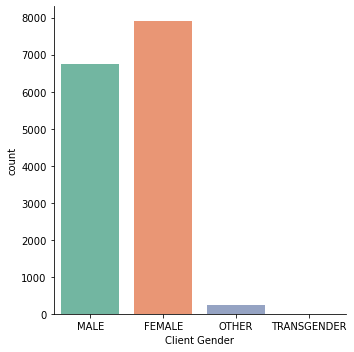

In [38]:
# visualizando o gênero dos pacientes

sns.catplot(x='Client Gender', kind='count', palette='Set2', data=dataset)

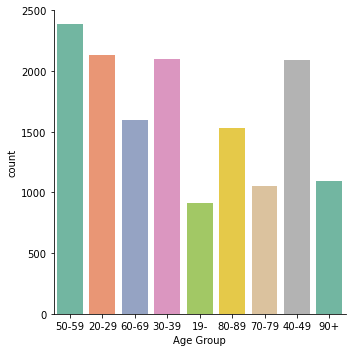

In [49]:
# visualizando a faixa etária dos pacientes

sns.catplot(x='Age Group', kind='count', palette='Set2', data=dataset)